## Eksploracja danych ‚Äì analiza wstƒôpna

## Ten projekt dotyczy analizy danych medycznych pacjent√≥w z niewydolno≈õciƒÖ serca i pr√≥by przewidzenia ryzyka zgonu za pomocƒÖ r√≥≈ºnych algorytm√≥w uczenia maszynowego.

In [76]:
!pip install mlxtend


[notice] A new release of pip is available: 24.3.1 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [77]:
!pip install tensorflow



[notice] A new release of pip is available: 24.3.1 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [78]:
import random
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, recall_score, precision_score, accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.base import BaseEstimator
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from mlxtend.plotting import plot_confusion_matrix

from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.svm import SVC
from sklearn import tree
import random
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn import preprocessing
from sklearn import metrics

from sklearn.model_selection import GridSearchCV,learning_curve
from sklearn import datasets
from tensorflow import keras
from numpy import mean, cov
from numpy.linalg import eig
from sklearn.decomposition import PCA
from matplotlib.pyplot import figure, show
from matplotlib.ticker import MaxNLocator

In [79]:
import pandas as pd

# Wczytanie danych z pulpitu 
heartData = pd.read_csv(r'C:\Users\dell\Desktop\heart_failure_clinical_records_dataset.csv')


print("Kolumny w pliku CSV:")
print(heartData.columns)


age = heartData['age']
anaemia = heartData['anaemia']
cpk = heartData['creatinine_phosphokinase']
diabetes = heartData['diabetes']
ef = heartData['ejection_fraction']
hbp = heartData['high_blood_pressure']
platelets = heartData['platelets']
cr = heartData['serum_creatinine']
sod = heartData['serum_sodium']
gender = heartData['sex']
smoke = heartData['smoking']
time = heartData['time']
death = heartData['DEATH_EVENT']  


col_names = ['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'ejection_fraction',
             'high_blood_pressure', 'platelets', 'serum_creatinine', 'serum_sodium',
             'sex', 'smoking', 'time']

Kolumny w pliku CSV:
Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')


In [80]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

# Podzia≈Ç danych: cechy (X) i etykieta (y)
X = heartData.drop('DEATH_EVENT', axis=1)
y = heartData['DEATH_EVENT']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0, shuffle=True
)

# Standaryzacja danych (≈õrednia = 0, odchylenie = 1)
scaler = preprocessing.StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Zbi√≥r danych

Zbi√≥r danych zawiera 1 zmiennƒÖ docelowƒÖ i 12 cech wej≈õciowych obejmujƒÖcych informacje kliniczne, fizyczne i dotyczƒÖce stylu ≈ºycia:

Age ‚Äì Wiek pacjenta

Anaemia ‚Äì Niedokrwisto≈õƒá (spadek liczby czerwonych krwinek lub poziomu hemoglobiny)

High Blood Pressure ‚Äì Czy pacjent ma nadci≈õnienie

Creatinine phosphokinase (CPK) ‚Äì Poziom enzymu CPK we krwi

Diabetes ‚Äì Czy pacjent choruje na cukrzycƒô

Ejection fraction ‚Äì Procentowa ilo≈õƒá krwi wypompowywanej z serca przy ka≈ºdym skurczu

Sex ‚Äì P≈Çeƒá pacjenta (kobieta lub mƒô≈ºczyzna)

Platelets ‚Äì Liczba p≈Çytek krwi

Serum creatinine ‚Äì Poziom kreatyniny we krwi

Serum sodium ‚Äì Poziom sodu we krwi

Smoking ‚Äì Czy pacjent pali papierosy

Time ‚Äì Czas obserwacji po wystƒÖpieniu niewydolno≈õci serca

Death event (zmienna docelowa) ‚Äì Czy pacjent zmar≈Ç w trakcie okresu obserwacji

In [81]:
heartData.describe()  

age     anaemia  creatinine_phosphokinase    diabetes  \
count  299.000000  299.000000                299.000000  299.000000   
mean    60.833893    0.431438                581.839465    0.418060   
std     11.894809    0.496107                970.287881    0.494067   
min     40.000000    0.000000                 23.000000    0.000000   
25%     51.000000    0.000000                116.500000    0.000000   
50%     60.000000    0.000000                250.000000    0.000000   
75%     70.000000    1.000000                582.000000    1.000000   
max     95.000000    1.000000               7861.000000    1.000000   

       ejection_fraction  high_blood_pressure      platelets  \
count         299.000000           299.000000     299.000000   
mean           38.083612             0.351171  263358.029264   
std            11.834841             0.478136   97804.236869   
min            14.000000             0.000000   25100.000000   
25%            30.000000             0.000000  212500.000000   
50%            38.000000             0.000000  262000.000000   
75%            45.000000             1.000000  303500.000000   
max            80.000000             1.000000  850000.000000   

       serum_creatinine  serum_sodium         sex    smoking        time  \
count         299.00000    299.000000  299.000000  299.00000  299.000000   
mean            1.39388    136.625418    0.648829    0.32107  130.260870   
std             1.03451      4.412477    0.478136    0.46767   77.614208   
min             0.50000    113.000000    0.000000    0.00000    4.000000   
25%             0.90000    134.000000    0.000000    0.00000   73.000000   
50%             1.10000    137.000000    1.000000    0.00000  115.000000   
75%             1.40000    140.000000    1.000000    1.00000  203.000000   
max             9.40000    148.000000    1.000000    1.00000  285.000000   

       DEATH_EVENT  
count    299.00000  
mean       0.32107  
std        0.46767  
min        0.00000  
25%        0.00000  
50%        0.00000  
75%        1.00000  
max        1.00000

**Sprawdzenie brak√≥w danych**

In [82]:

print("Liczba brakujƒÖcych warto≈õci w ka≈ºdej kolumnie:")
print(heartData.isnull().sum())


Liczba brakujƒÖcych warto≈õci w ka≈ºdej kolumnie:
age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64


In [83]:
heartData.shape

(299, 13)

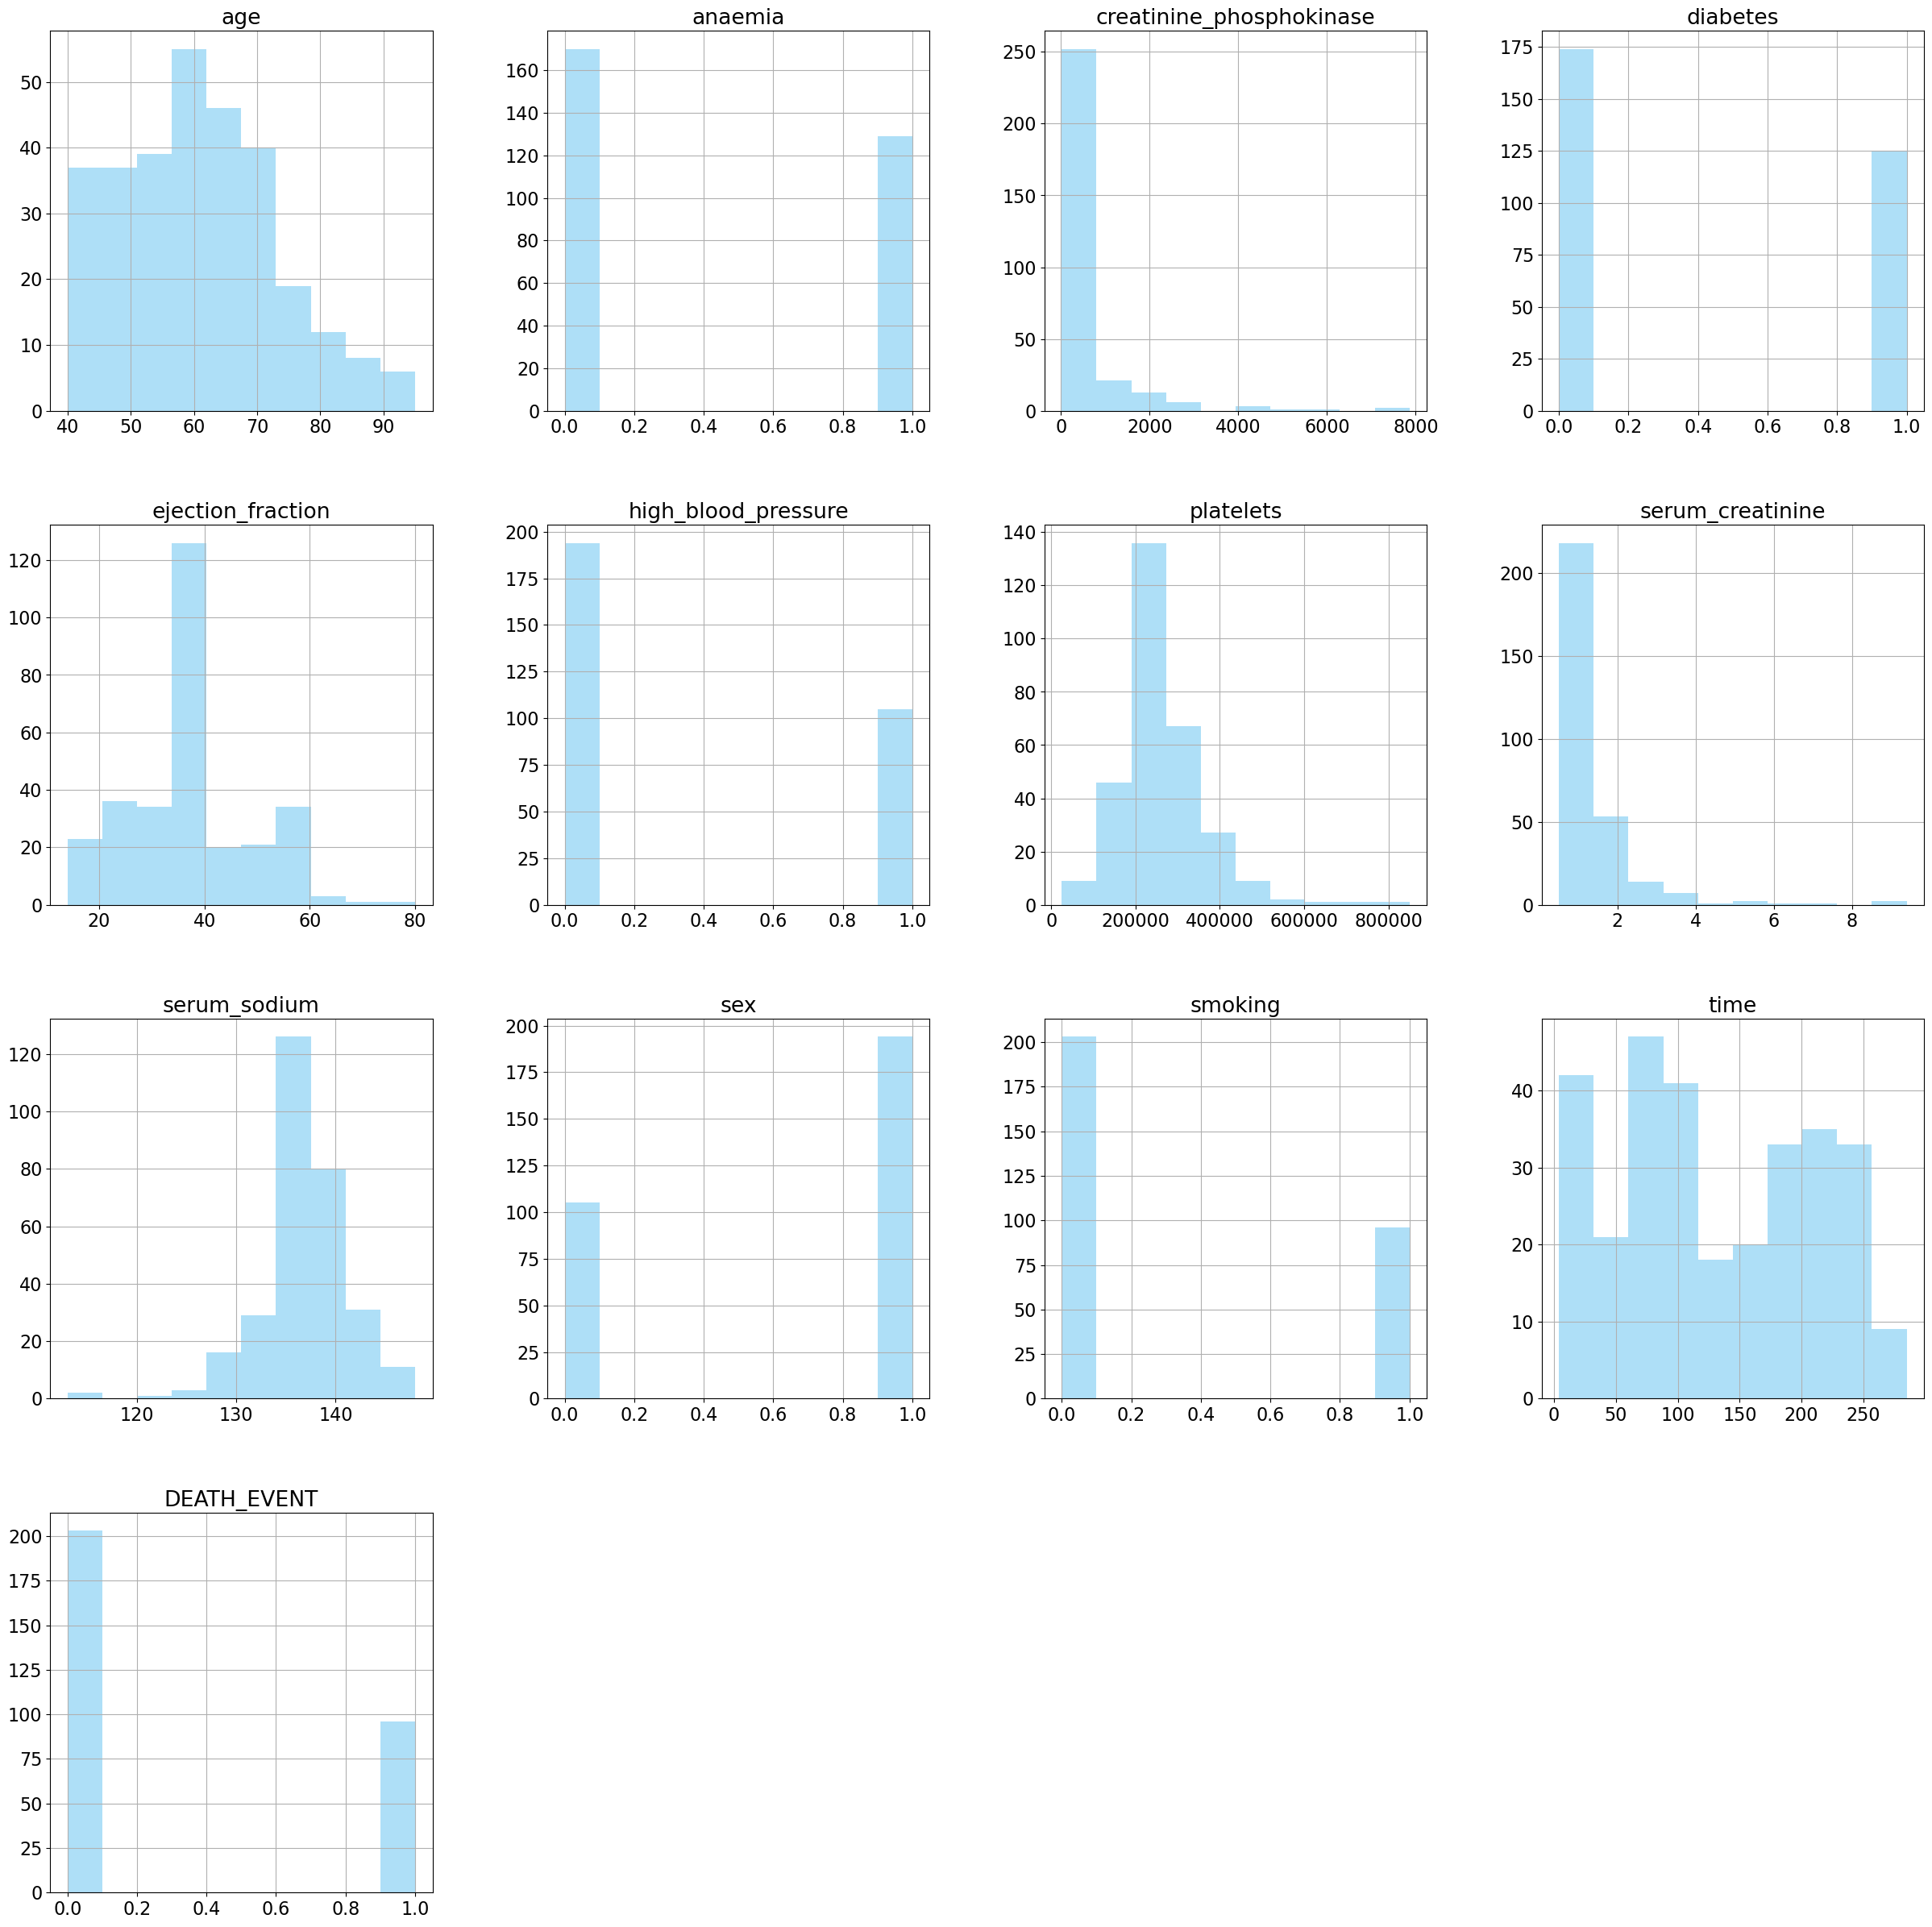

In [84]:
heartData.hist(bins=10,figsize=(30,30),color = '#AEDFF7')
plt.show()

## **Ilu pacjent√≥w prze≈ºy≈Ço po przebytej niewydolno≈õci serca?**

In [85]:
print(heartData.columns)

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')


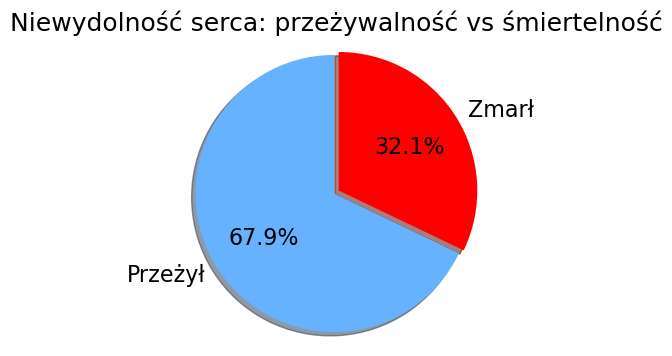

In [86]:
import matplotlib.pyplot as plt

labels = ['Prze≈ºy≈Ç', 'Zmar≈Ç']
sizes = [
    len(heartData[heartData['DEATH_EVENT'] == 0]),
    len(heartData[heartData['DEATH_EVENT'] == 1])
]
explode = (0, 0.04) 

fig1, ax1 = plt.subplots(figsize=(4, 4))
ax1.pie(
    sizes,
    explode=explode,
    labels=labels,
    autopct='%1.1f%%',
    shadow=True,
    colors=('#66B2FF', '#FF0000'), 
    startangle=90,
    textprops={'fontsize': 16}
)

ax1.set_title(
    "Niewydolno≈õƒá serca: prze≈ºywalno≈õƒá vs ≈õmiertelno≈õƒá",
    fontdict={'fontsize': 18}
)
ax1.axis('equal') 

plt.show()


Wyniki: Nieco ponad 2/3 pacjent√≥w prze≈ºy≈Ço po wystƒÖpieniu niewydolno≈õci serca.

## Czy p≈Çeƒá wp≈Çywa na prze≈ºywalno≈õƒá pacjent√≥w?

In [87]:
d1 = heartData[(heartData["DEATH_EVENT"] == 0) & (heartData["sex"] == 1)]  # mƒô≈ºczy≈∫ni, kt√≥rzy prze≈ºyli
d2 = heartData[(heartData["DEATH_EVENT"] == 1) & (heartData["sex"] == 1)]  # mƒô≈ºczy≈∫ni, kt√≥rzy zmarli
d3 = heartData[(heartData["DEATH_EVENT"] == 0) & (heartData["sex"] == 0)]  # kobiety, kt√≥re prze≈ºy≈Çy
d4 = heartData[(heartData["DEATH_EVENT"] == 1) & (heartData["sex"] == 0)]  # kobiety, kt√≥re zmar≈Çy


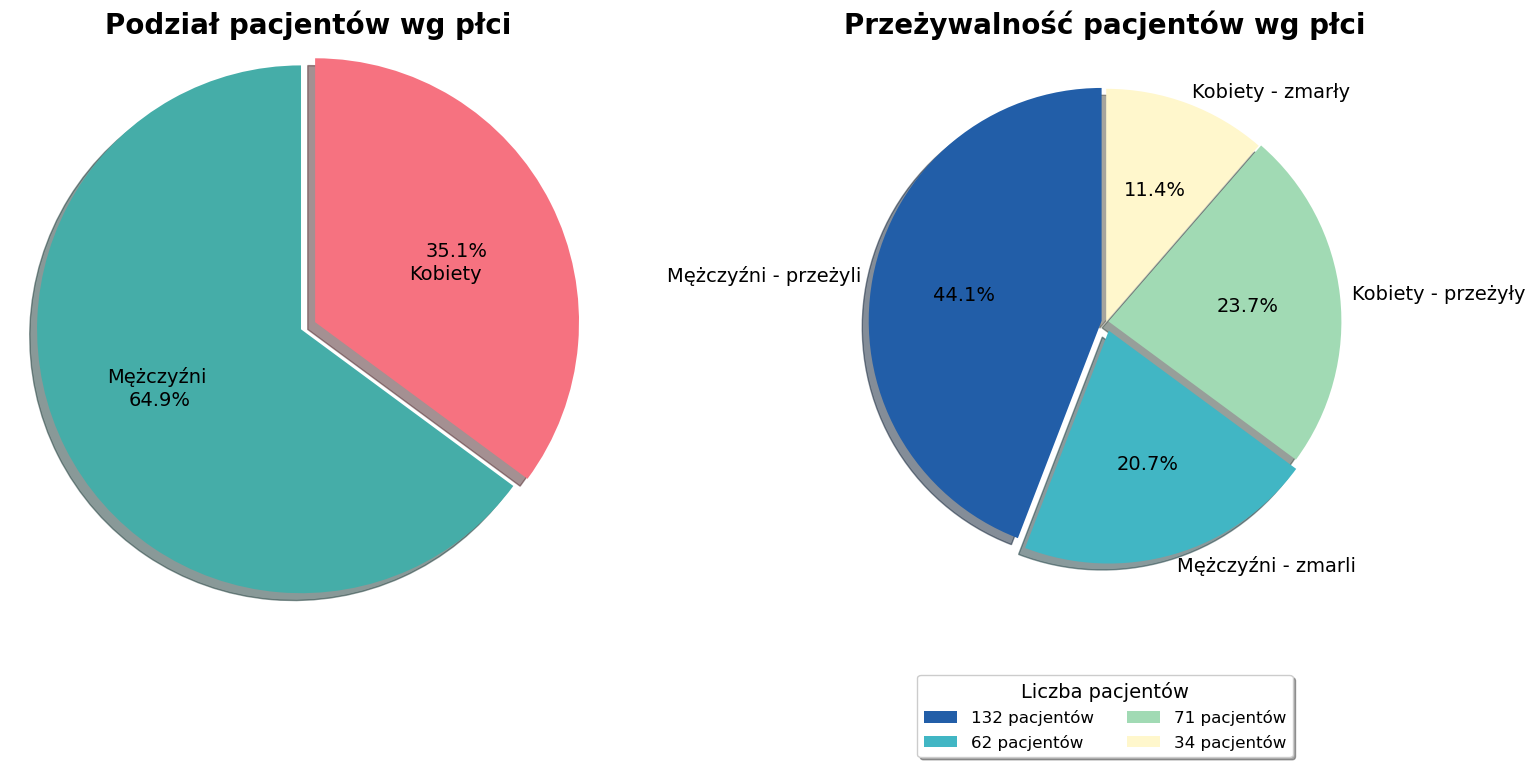

In [88]:
labels = ['Mƒô≈ºczy≈∫ni', 'Kobiety']
size1 = [len(d1) + len(d2), len(d3) + len(d4)]
explode = (0.02, 0.04)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

# Wykres 1: rozk≈Çad p≈Çci
ax1.pie(size1, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, colors=['#45ADA8', '#F67280'], labeldistance=0.4,
        startangle=90, textprops={'fontsize': 14})
ax1.set_title("Podzia≈Ç pacjent√≥w wg p≈Çci", fontdict={'fontsize': 20, 'weight': 'bold'})
ax1.axis('equal')

# Wykres 2: prze≈ºywalno≈õƒá wg p≈Çci
labels2 = ['Mƒô≈ºczy≈∫ni - prze≈ºyli', 'Mƒô≈ºczy≈∫ni - zmarli', 
           'Kobiety - prze≈ºy≈Çy', 'Kobiety - zmar≈Çy']
size2 = [len(d1), len(d2), len(d3), len(d4)]
explode2 = (0.02, 0.04, 0.01, 0)

ax2.pie(size2, explode=explode2, labels=labels2, autopct='%1.1f%%',
        shadow=True, colors=['#225ea8', '#41b6c4', '#a1dab4', '#fff7cc'],
        labeldistance=1.05, startangle=90, textprops={'fontsize': 14})
ax2.set_title("Prze≈ºywalno≈õƒá pacjent√≥w wg p≈Çci", fontdict={'fontsize': 20, 'weight': 'bold'})
ax2.axis('equal')

# Legenda poni≈ºej drugiego wykresu
ax2.legend([f'{x} pacjent√≥w' for x in size2],
           title="Liczba pacjent√≥w", loc='upper center',
           bbox_to_anchor=(0.5, -0.1), shadow=True, ncol=2,
           fontsize=12, title_fontsize=14)

plt.tight_layout()
plt.show()

## Jaki jest og√≥lny przedzia≈Ç wiekowy pacjent√≥w?

C:\Users\dell\AppData\Local\Temp\ipykernel_7740\213553082.py:10: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



Minimalny wiek pacjenta: 40.0
Maksymalny wiek pacjenta: 95.0


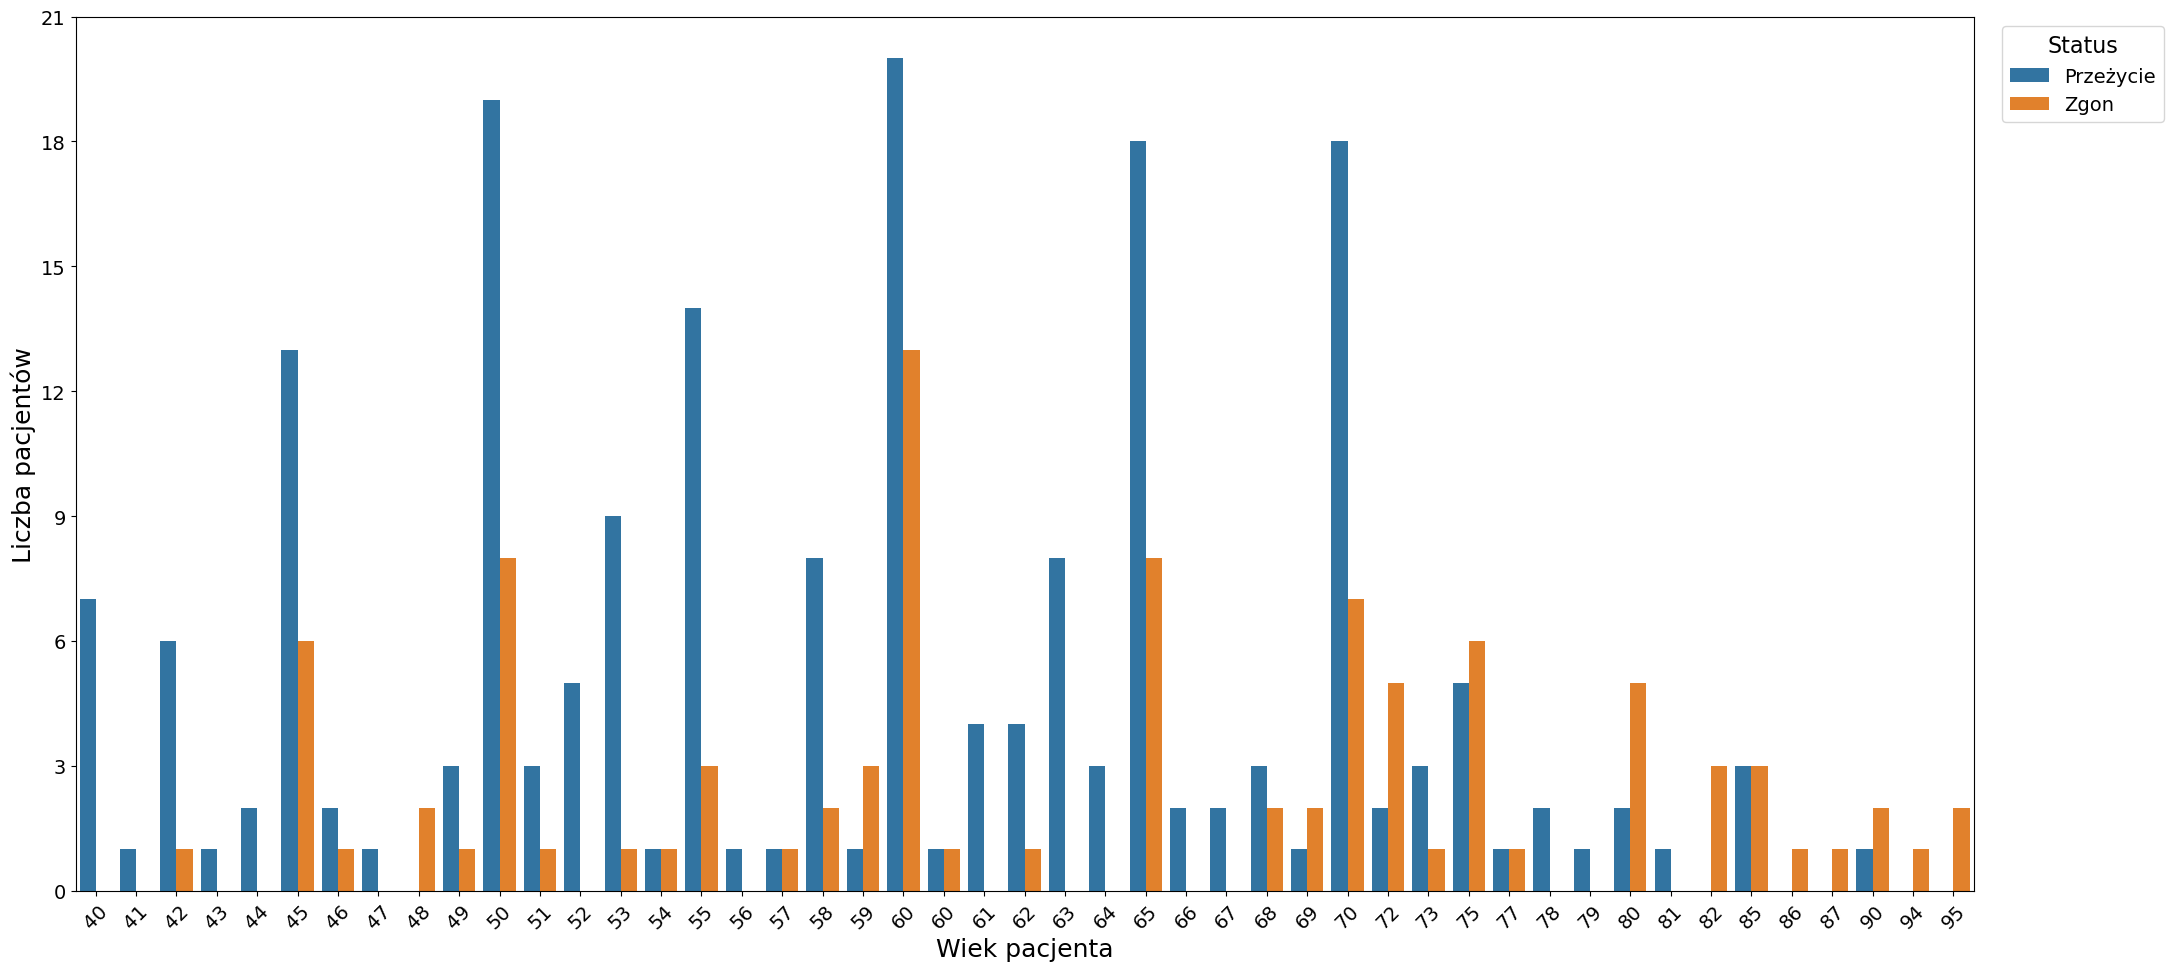

In [89]:
plt.figure(figsize=(22, 10))

# Wykres
dia = sns.countplot(x=heartData['age'], hue=heartData['DEATH_EVENT'], palette=['#1f77b4', '#ff7f0e'])


dia.yaxis.set_major_locator(MaxNLocator(integer=True))

# O≈õ X ‚Äî bez .0
dia.set_xticklabels([int(float(label.get_text())) for label in dia.get_xticklabels()], rotation=45, fontsize=14)

# O≈õ Y
plt.yticks(fontsize=14)
plt.xlabel('Wiek pacjenta', fontsize=18)
plt.ylabel('Liczba pacjent√≥w', fontsize=18)

# Legenda
legend_labels, _ = dia.get_legend_handles_labels()
dia.legend(legend_labels, ['Prze≈ºycie', 'Zgon'],
           bbox_to_anchor=(1.01, 1), loc='upper left',
           title='Status', fontsize=14, title_fontsize=16)
# Wy≈õwietlenie wieku minimalnego i maksymalnego
print("Minimalny wiek pacjenta:", min(age))
print("Maksymalny wiek pacjenta:", max(age))


plt.tight_layout()
plt.show()

## Analiza zmiennych kategorycznych 

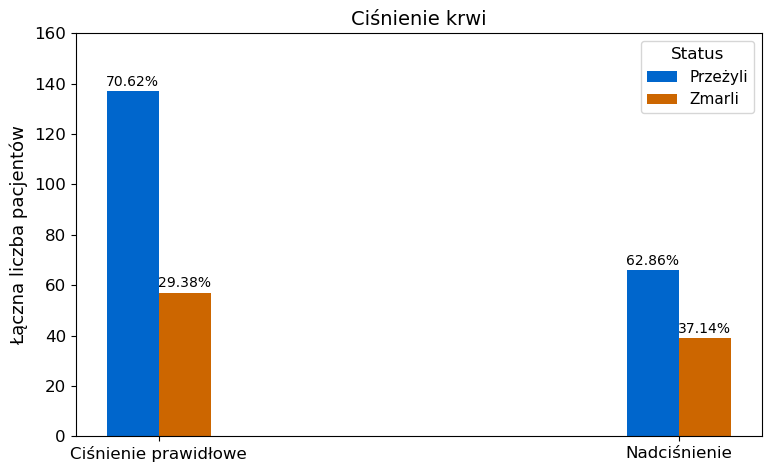

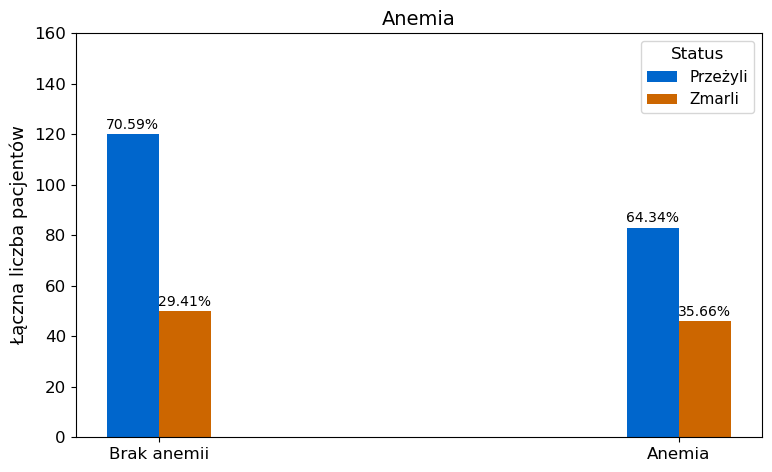

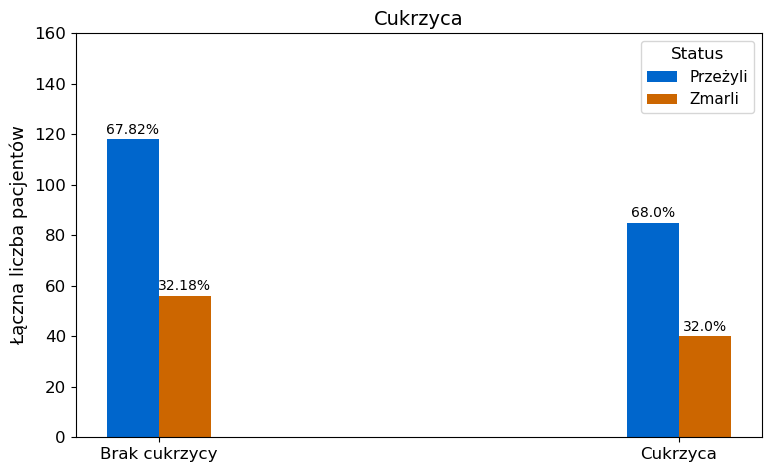

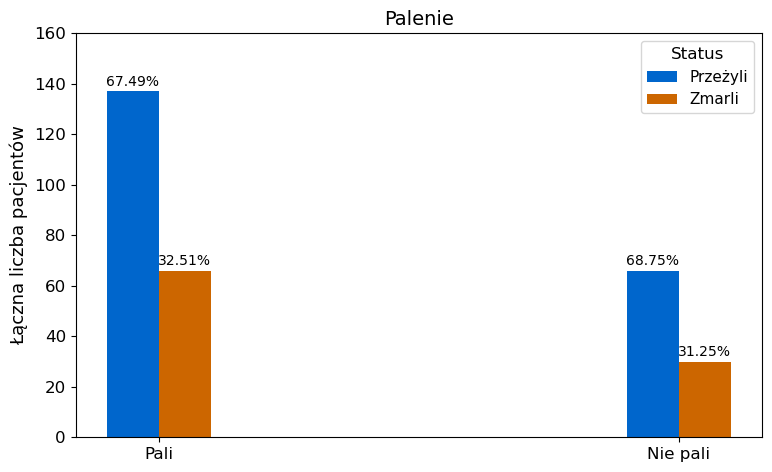

In [90]:
import matplotlib.pyplot as plt

cat = ['high_blood_pressure', 'anaemia', 'diabetes', 'smoking']
types = [['Ci≈õnienie prawid≈Çowe', 'Nadci≈õnienie'],
         ['Brak anemii', 'Anemia'],
         ['Brak cukrzycy', 'Cukrzyca'],
         ['Pali', 'Nie pali']]

cat_titles = {
    'high_blood_pressure': 'Ci≈õnienie krwi',
    'anaemia': 'Anemia',
    'diabetes': 'Cukrzyca',
    'smoking': 'Palenie'
}

for i, c in enumerate(cat):
    alive = heartData[heartData['DEATH_EVENT'] == 0]
    died = heartData[heartData['DEATH_EVENT'] == 1]

    plt.figure(figsize=(8, 5))

    # S≈Çupki dla prze≈ºyli i zmarli
    bar1 = plt.bar([0, 1], alive.groupby(c).count()['age'], width=0.1,
                   color='#0066cc', align='center', label="Prze≈ºyli")
    bar2 = plt.bar([0.1, 1.1], died.groupby(c).count()['age'], width=0.1,
                   color='#cc6600', align='center', label="Zmarli")


    plt.title(cat_titles[c], fontsize=14)
    plt.ylabel('≈ÅƒÖczna liczba pacjent√≥w', fontsize=13)
    plt.ylim(0, 160)
    plt.xticks([0.05, 1.05], types[i], fontsize=12)
    plt.yticks(fontsize=12)
    plt.legend(title='Status', fontsize=11, title_fontsize=12)

    # Procenty
    hights_odd = []
    hights_even = []

    for j, rect in enumerate(bar1 + bar2):
        height = rect.get_height()
        if (j + 1) % 2 == 0:
            hights_even.append(height)
        else:
            hights_odd.append(height)

    for j, rect in enumerate(bar1 + bar2):
        height = rect.get_height()
        if (j + 1) % 2 == 0:
            pct = round((height / sum(hights_even)) * 100, 2)
        else:
            pct = round((height / sum(hights_odd)) * 100, 2)

        plt.text(rect.get_x() + rect.get_width() / 2.0, height + 1,
                 f'{pct}%', ha='center', va='bottom', fontsize=10)

    plt.tight_layout()
    plt.show()

## Analiza cech numerycznych zbioru danych

C:\Users\dell\AppData\Local\Temp\ipykernel_7740\4240343916.py:25: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\dell\AppData\Local\Temp\ipykernel_7740\4240343916.py:27: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\dell\AppData\Local\Temp\ipykernel_7740\4240343916.py:25: UserWarning:



`distplot` is a 

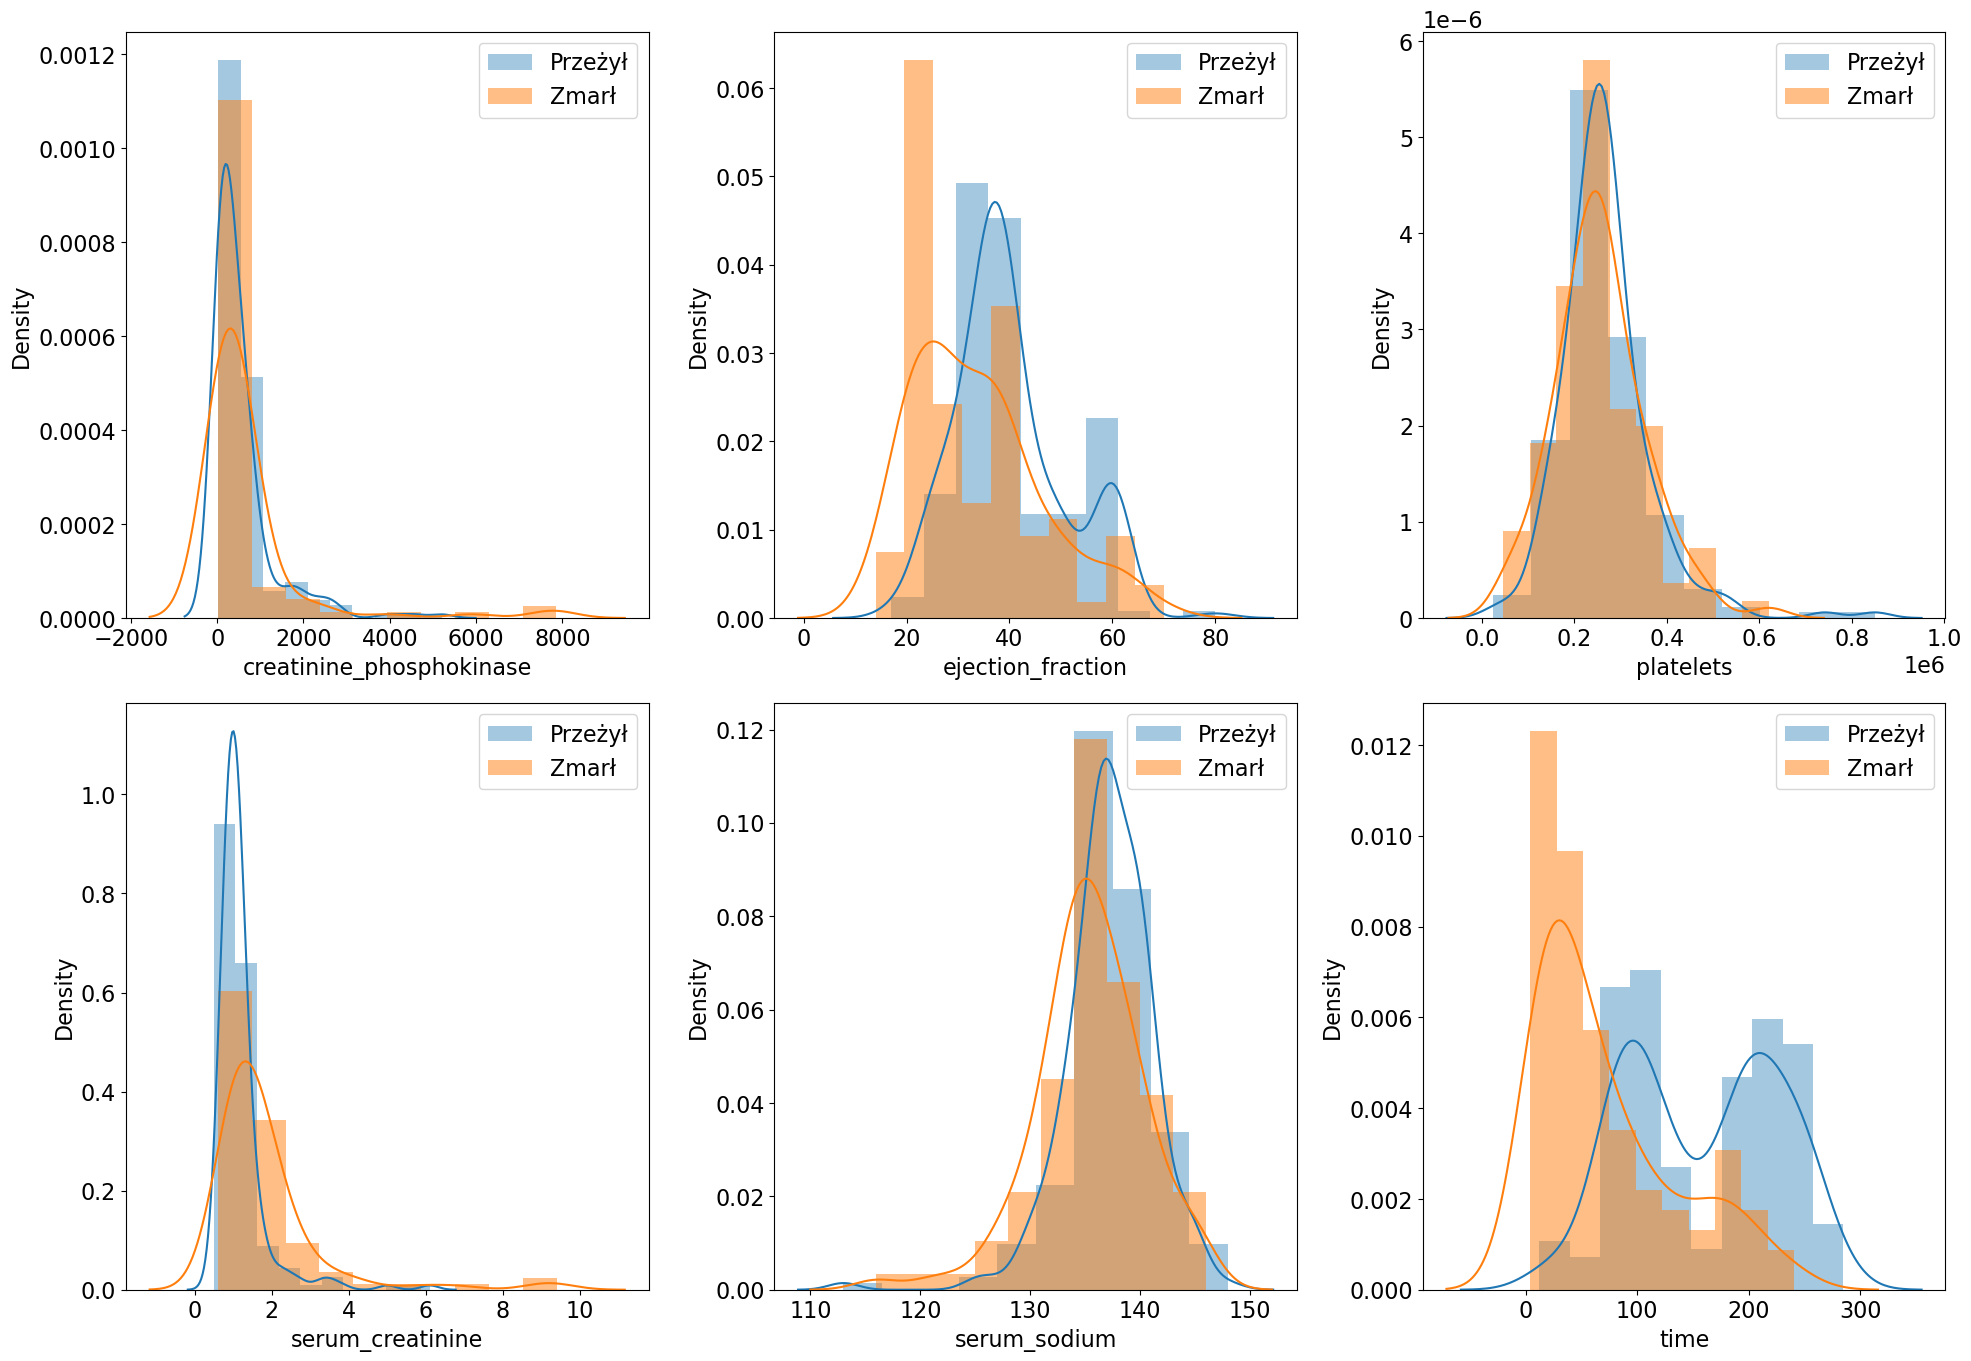

In [91]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning) 
plt.rcParams.update({'font.size': 16})  

df_copy = heartData.copy()

# Zmiana typ√≥w kolumn na kategoryczne ‚Äì ≈ºeby filtrowaƒá tylko kolumny numeryczne
for col in ['creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time']:
    df_copy[col] = df_copy[col].astype('category')


df_grouped = df_copy.groupby(by='DEATH_EVENT')


fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(20, 20))


titles = list(df_copy.select_dtypes(include='category'))

# Iteracja przez wykresy i kolumny
ax_title_pairs = zip(axs.flat, titles)

for ax, title in ax_title_pairs:
    # Rozk≈Çad dla pacjent√≥w, kt√≥rzy prze≈ºyli
    sns.distplot(df_grouped.get_group(0)[title], bins=10, ax=ax, label='Prze≈ºy≈Ç')
    # Rozk≈Çad dla pacjent√≥w, kt√≥rzy zmarli
    sns.distplot(df_grouped.get_group(1)[title], bins=10, ax=ax, label='Zmar≈Ç', hist_kws=dict(alpha=0.5))
    ax.legend()

axs.flat[-1].remove()
axs.flat[-2].remove()
axs.flat[-3].remove()

# Dopasowanie uk≈Çadu
fig.tight_layout()


##  Wyszukiwanie korelacji w zbiorze danych

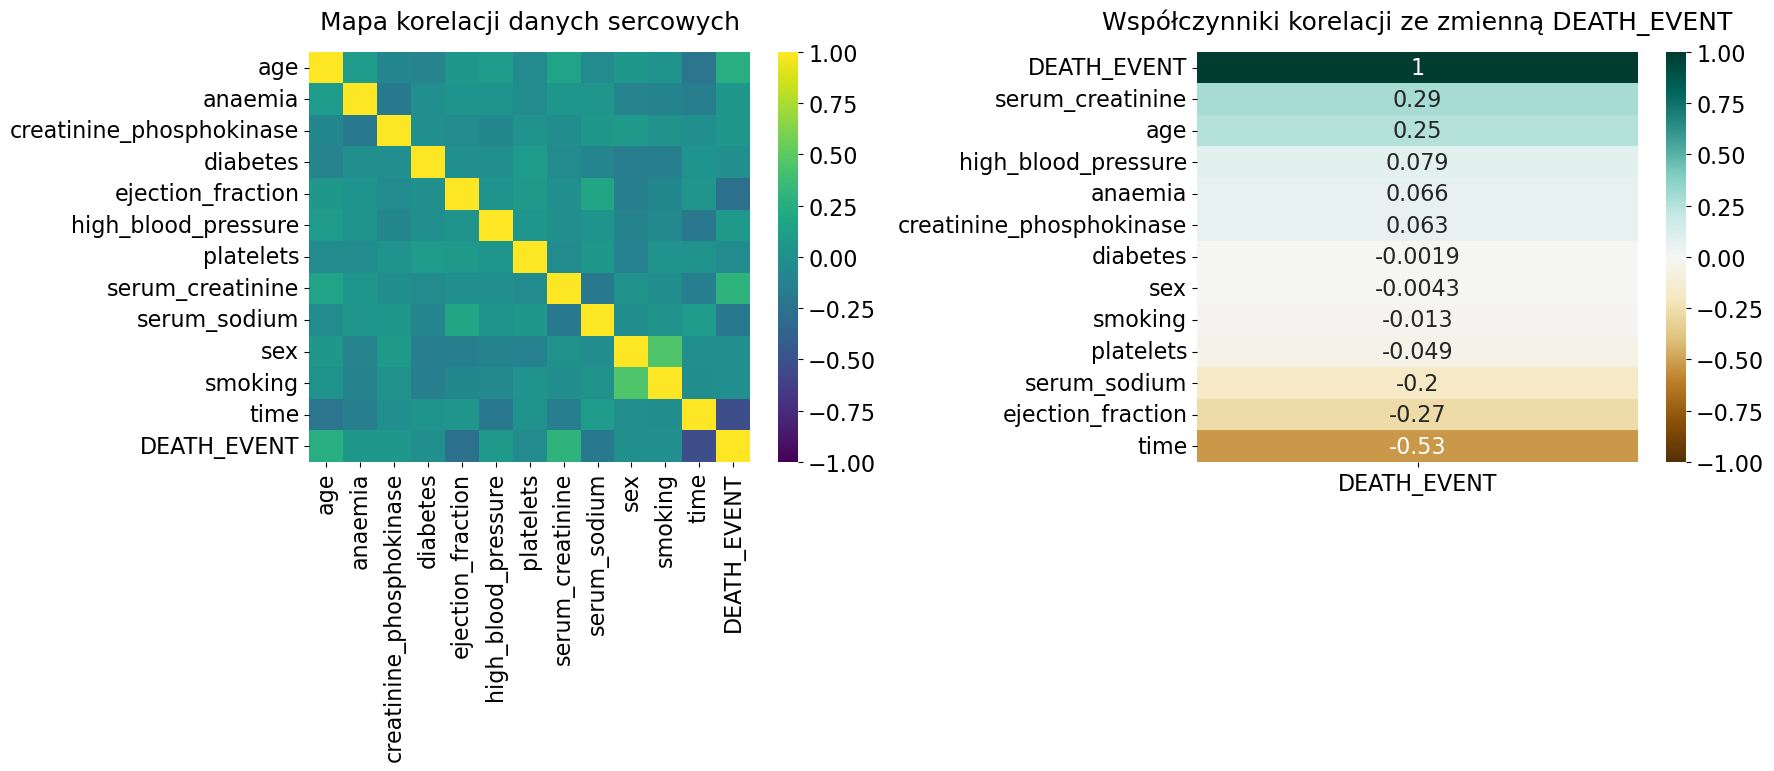

In [92]:
corr = heartData.corr()

fig, (axh1, axh2) = plt.subplots(1, 2, figsize=(18, 8))

# Pe≈Çna macierz korelacji
heatmap1 = sns.heatmap(corr, vmin=-1, cmap='viridis', annot=False, ax=axh1)
heatmap1.set_title('Mapa korelacji danych sercowych', fontdict={'fontsize':18}, pad=16)

# Korelacje wzglƒôdem zmiennej DEATH_EVENT
heatmap = sns.heatmap(heartData.corr()[['DEATH_EVENT']].sort_values(by='DEATH_EVENT', ascending=False),
                      vmin=-1, vmax=1, annot=True, cmap='BrBG', ax=axh2)
heatmap.set_title('Wsp√≥≈Çczynniki korelacji ze zmiennƒÖ DEATH_EVENT', fontdict={'fontsize':18}, pad=16)

plt.tight_layout()
plt.show()

Z analizy danych wynika, ≈ºe:

-Osoby z ni≈ºszym poziomem sodu we krwi, gorszƒÖ pracƒÖ serca i kr√≥tszym czasem leczenia czƒô≈õciej umierajƒÖ.

-Natomiast starszy wiek i wysoki poziom kreatyniny (czyli problemy z nerkami) r√≥wnie≈º zwiƒôkszajƒÖ ryzyko ≈õmierci.

In [104]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=5, shuffle=True, random_state=42)
for i, (train_index, test_index) in enumerate(kf.split(X_norm)):
    print(f"Fold {i+1}: train size = {len(train_index)}, test size = {len(test_index)}")


Fold 1: train size = 239, test size = 60
Fold 2: train size = 239, test size = 60
Fold 3: train size = 239, test size = 60
Fold 4: train size = 239, test size = 60
Fold 5: train size = 240, test size = 59


W celu oceny wydajno≈õci modelu zastosowano 5-krotnƒÖ walidacjƒô krzy≈ºowƒÖ (K-Fold). Dane zosta≈Çy podzielone na 5 czƒô≈õci, z czego w ka≈ºdej iteracji model by≈Ç trenowany na 4 czƒô≈õciach i testowany na 1. W efekcie ka≈ºda obserwacja znalaz≈Ça siƒô raz w zbiorze testowym i cztery razy w zbiorze treningowym.

Podzia≈Ç danych by≈Ç niemal r√≥wnomierny ‚Äì 4 foldy mia≈Çy po 60 obserwacji testowych, a jeden fold 59. Takie r√≥≈ºnice wynikajƒÖ z faktu, ≈ºe liczba wszystkich obserwacji (299) nie dzieli siƒô idealnie przez 5.

Dziƒôki temu podej≈õciu otrzymujemy bardziej rzetelnƒÖ i stabilnƒÖ ocenƒô skuteczno≈õci modelu ni≈º przy pojedynczym podziale na zbi√≥r treningowy i testowy.

## Klasyfikator drzew decyzyjnych 


In [93]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = heartData.drop('DEATH_EVENT', axis=1)
y = heartData['DEATH_EVENT']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizacja
scaler = StandardScaler()
X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.transform(X_test)


In [94]:
dt_scores = []

for i in range(1, X_train_norm.shape[1] + 1):
    dt_classifier = DecisionTreeClassifier(max_features=i, random_state=0)
    dt_classifier.fit(X_train_norm, y_train)
    dt_scores.append(dt_classifier.score(X_test_norm, y_test))


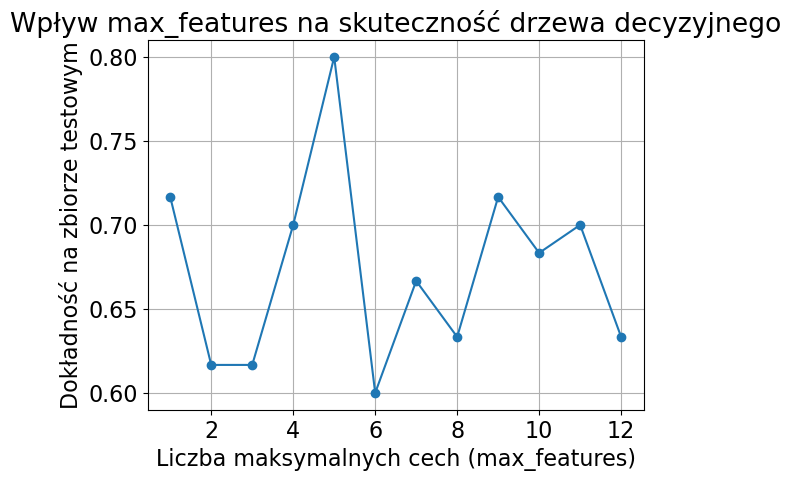

In [95]:
import matplotlib.pyplot as plt

plt.plot(range(1, X_train.shape[1] + 1), dt_scores, marker='o')
plt.xlabel('Liczba maksymalnych cech (max_features)')
plt.ylabel('Dok≈Çadno≈õƒá na zbiorze testowym')
plt.title('Wp≈Çyw max_features na skuteczno≈õƒá drzewa decyzyjnego')
plt.grid(True)
plt.show()


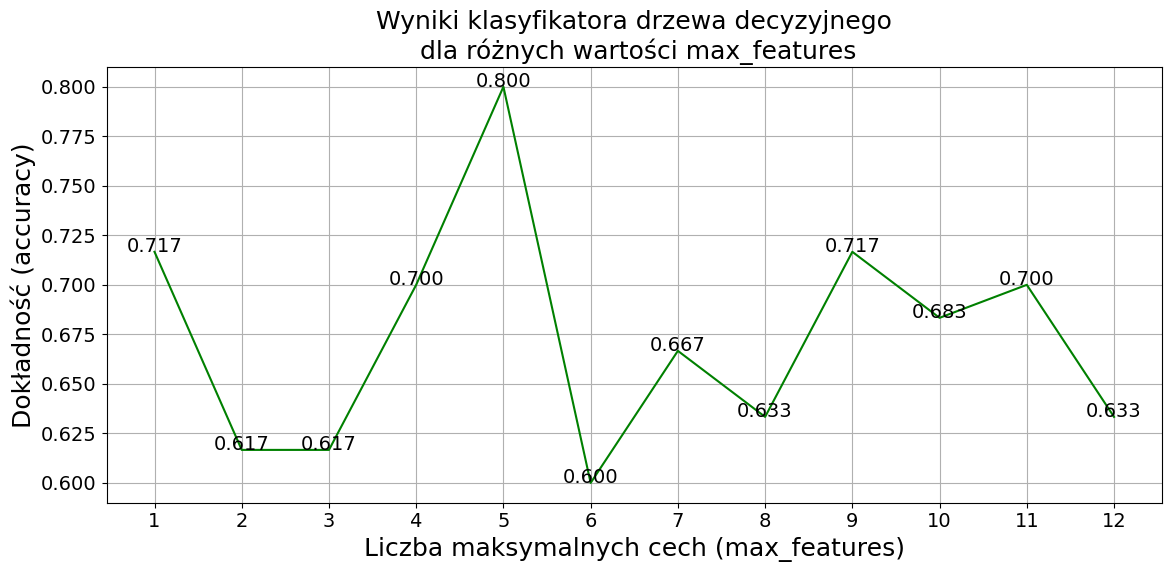

In [96]:
plt.figure(figsize=(12, 6))

# Zak≈Çadamy, ≈ºe dt_scores ju≈º istnieje
plt.plot(range(1, X_train.shape[1] + 1), dt_scores, color='green')

for i in range(1, X_train.shape[1] + 1):
    plt.text(i, dt_scores[i-1], "{0:.3f}".format(dt_scores[i-1]), fontsize=14, ha='center')

# Etykiety osi
plt.xticks(range(1, X_train.shape[1] + 1), fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Liczba maksymalnych cech (max_features)', fontdict={'fontsize': 18})
plt.ylabel('Dok≈Çadno≈õƒá (accuracy)', fontdict={'fontsize': 18})

# Tytu≈Ç
plt.title('Wyniki klasyfikatora drzewa decyzyjnego\n dla r√≥≈ºnych warto≈õci max_features', fontdict={'fontsize': 18})
plt.grid(True)
plt.tight_layout()
plt.show()

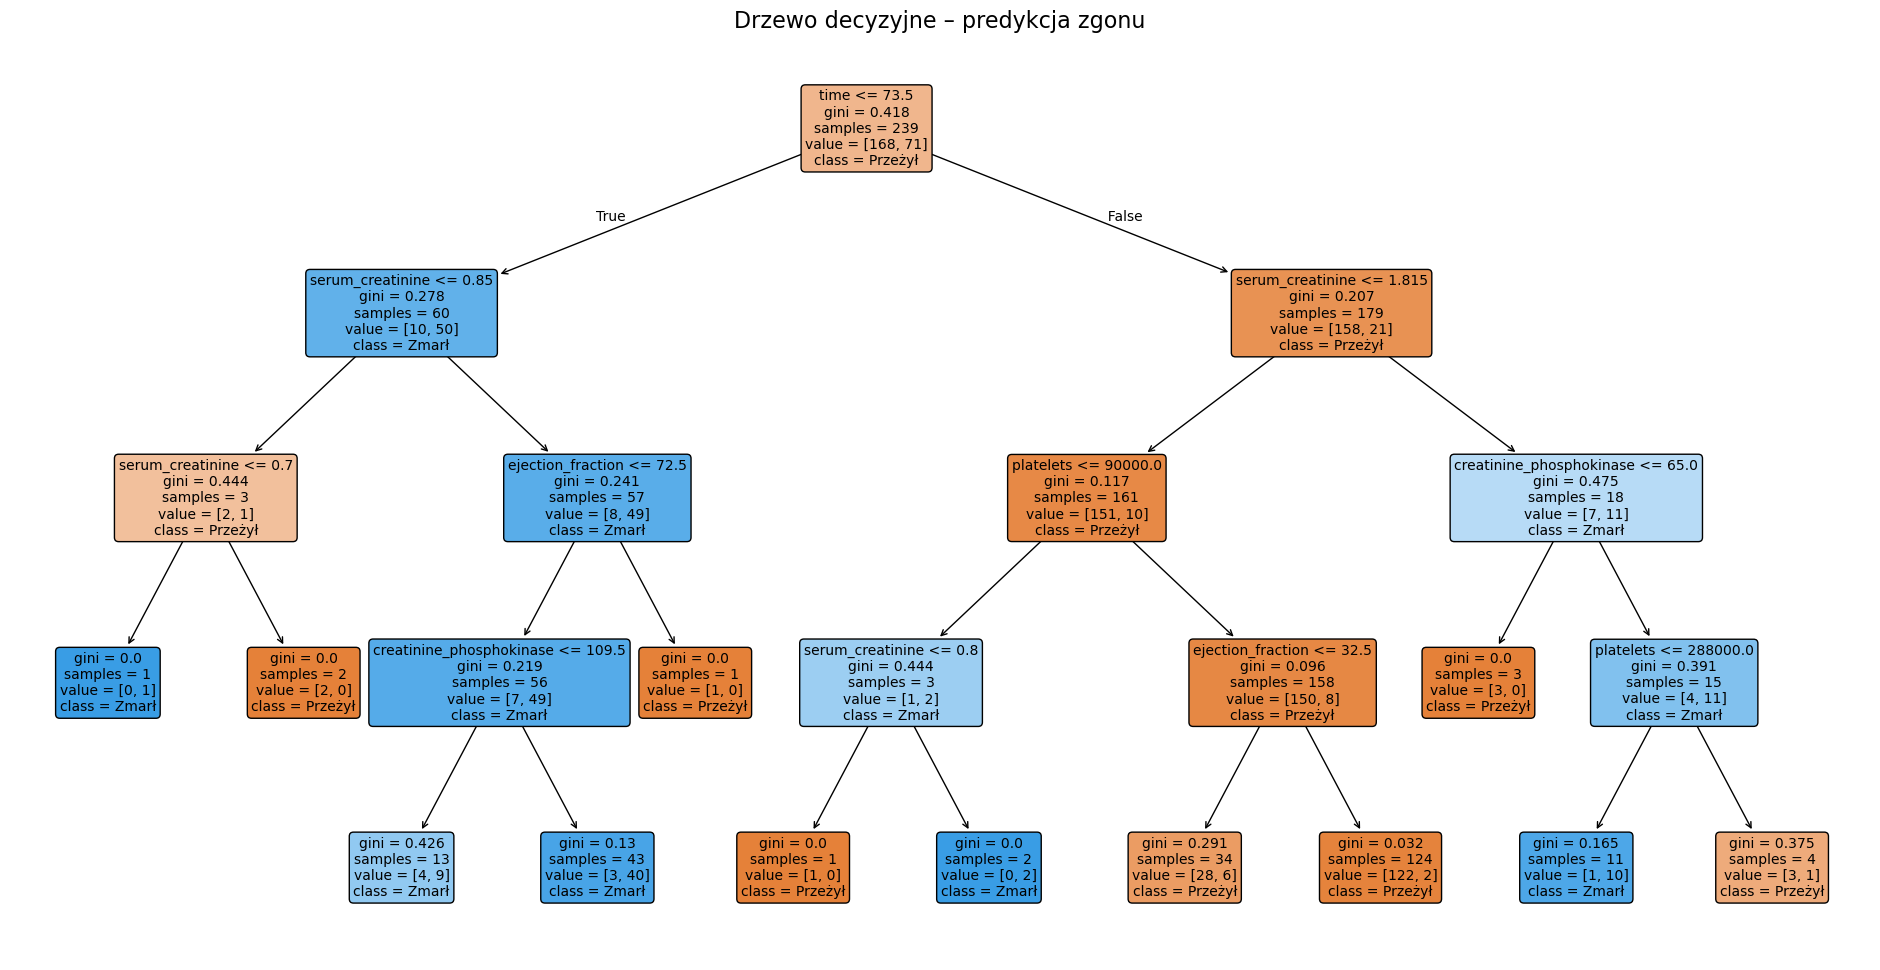

In [97]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Trenujemy drzewo decyzyjne
clf = DecisionTreeClassifier(max_depth=4, random_state=42)
clf.fit(X_train, y_train)

# Rysujemy drzewo
plt.figure(figsize=(24, 12))
plot_tree(
    clf,
    feature_names=X.columns,        
    class_names=["Prze≈ºy≈Ç", "Zmar≈Ç"], 
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Drzewo decyzyjne ‚Äì predykcja zgonu", fontsize=16)
plt.show()

Decision Tree Training Data Accuracy = 91.21
Decision Tree Test Data Accuracy  = 68.33
              precision    recall  f1-score   support

           0       0.69      0.83      0.75        35
           1       0.67      0.48      0.56        25

    accuracy                           0.68        60
   macro avg       0.68      0.65      0.66        60
weighted avg       0.68      0.68      0.67        60



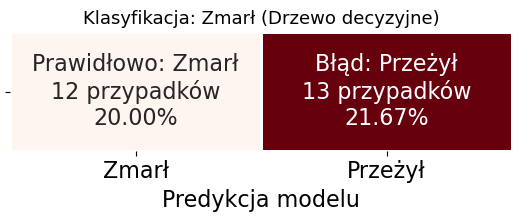

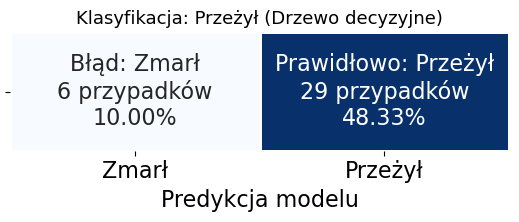

≈örednia dok≈Çadno≈õƒá (5-krotna walidacja krzy≈ºowa): 81.18%


In [98]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import tree
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import metrics

# Trenowanie modelu z ograniczeniem z≈Ço≈ºono≈õci 
dtree2 = tree.DecisionTreeClassifier(
    max_depth=3,
    min_samples_split=10,
    random_state=42
)
dt_parm = dtree2.fit(X_train_norm, y_train)
y_dtree = dtree2.predict(X_test_norm)

#  Ocena modelu
print("Decision Tree Training Data Accuracy = {:.2f}".format(100 * dt_parm.score(X_train_norm, y_train)))
print("Decision Tree Test Data Accuracy  = {:.2f}".format(100 * metrics.accuracy_score(y_test, y_dtree)))
print(classification_report(y_test, y_dtree))

#  Macierz pomy≈Çek
cm = confusion_matrix(y_test, y_dtree)
TP = cm[1, 1]
FN = cm[1, 0]
FP = cm[0, 1]
TN = cm[0, 0]
total = cm.sum()

# Wykres ‚Äì klasa "Zmar≈Ç"
data_zmarl = np.array([[TP, FN]])
labels_zmarl = np.array([[
    f"Prawid≈Çowo: Zmar≈Ç\n{TP} przypadk√≥w\n{TP/total:.2%}",
    f"B≈ÇƒÖd: Prze≈ºy≈Ç\n{FN} przypadk√≥w\n{FN/total:.2%}"
]])

plt.figure(figsize=(5.5, 2.5))
sns.heatmap(data_zmarl, annot=labels_zmarl, fmt='', cmap='Reds',
            xticklabels=["Zmar≈Ç", "Prze≈ºy≈Ç"], yticklabels=[""],
            cbar=False, linewidths=1)
plt.title("Klasyfikacja: Zmar≈Ç (Drzewo decyzyjne)", fontsize=13)
plt.xlabel("Predykcja modelu")
plt.tight_layout()
plt.savefig("klasyfikacja_zmar≈Ç.png", dpi=300, bbox_inches='tight')
plt.show()

#  Wykres ‚Äì klasa "Prze≈ºy≈Ç"
data_przezyli = np.array([[FP, TN]])
labels_przezyli = np.array([[
    f"B≈ÇƒÖd: Zmar≈Ç\n{FP} przypadk√≥w\n{FP/total:.2%}",
    f"Prawid≈Çowo: Prze≈ºy≈Ç\n{TN} przypadk√≥w\n{TN/total:.2%}"
]])

plt.figure(figsize=(5.5, 2.5))
sns.heatmap(data_przezyli, annot=labels_przezyli, fmt='', cmap='Blues',
            xticklabels=["Zmar≈Ç", "Prze≈ºy≈Ç"], yticklabels=[""],
            cbar=False, linewidths=1)
plt.title("Klasyfikacja: Prze≈ºy≈Ç (Drzewo decyzyjne)", fontsize=13)
plt.xlabel("Predykcja modelu")
plt.tight_layout()
plt.savefig("klasyfikacja_prze≈ºy≈Ç.png", dpi=300, bbox_inches='tight')
plt.show()
scores = cross_val_score(dtree2, X_train_norm, y_train, cv=5, scoring='accuracy')
print("≈örednia dok≈Çadno≈õƒá (5-krotna walidacja krzy≈ºowa): {:.2f}%".format(100 * scores.mean()))


Z analizy metryk wynika, ≈ºe:

model lepiej klasyfikuje pacjent√≥w, kt√≥rzy prze≈ºyli (klasa 0, recall 83%) ni≈º tych, kt√≥rzy zmarli (klasa 1, recall tylko 48%),

precyzja i f1-score dla klasy "zmar≈Ç" sƒÖ znacznie ni≈ºsze, co oznacza, ≈ºe model ma trudno≈õƒá z poprawnym wykrywaniem tej klasy.

## Random Forest Classifier

In [99]:
RFC=RandomForestClassifier(max_features='sqrt', max_depth=1000, random_state=1, n_estimators=1000, min_samples_split=2)
RFC_clf = RFC.fit(X_train_norm, y_train)
y_RFC=RFC.predict(X_test_norm)

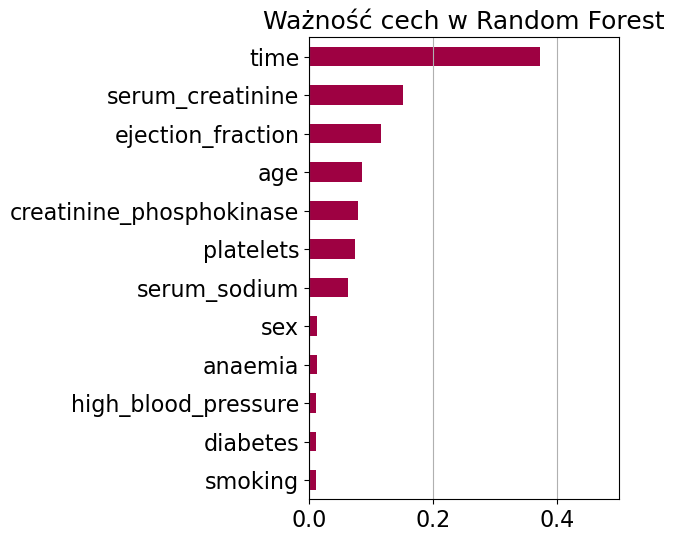

<Figure size 640x480 with 0 Axes>

In [100]:
plt.figure(figsize=(4,6))
feat_importances = pd.Series(RFC_clf.feature_importances_, heartData.drop('DEATH_EVENT', axis=1).columns)
feat_importances.nsmallest(12).plot(kind='barh', cmap=plt.cm.Spectral)

plt.xlim((0, 0.5))
plt.grid(axis='x')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.title('Wa≈ºno≈õƒá cech w Random Forest', fontdict={'fontsize': 18})
plt.show()

plt.clf()


Random Forest ‚Äì dok≈Çadno≈õƒá treningowa: 92.89%
Random Forest ‚Äì dok≈Çadno≈õƒá testowa: 73.33%

Raport klasyfikacji:

              precision    recall  f1-score   support

     Prze≈ºy≈Ç       0.71      0.91      0.80        35
       Zmar≈Ç       0.80      0.48      0.60        25

    accuracy                           0.73        60
   macro avg       0.76      0.70      0.70        60
weighted avg       0.75      0.73      0.72        60



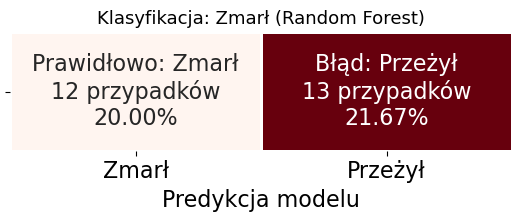

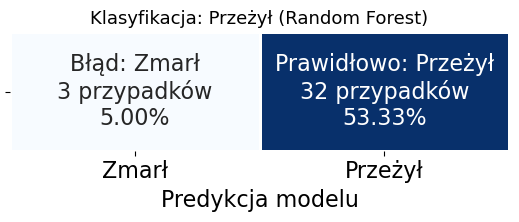

≈örednia dok≈Çadno≈õƒá (5-krotna walidacja krzy≈ºowa): 84.61%


In [101]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Skalowanie danych
scaler = StandardScaler()
X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.transform(X_test)

# Po≈ÇƒÖczenie danych do walidacji krzy≈ºowej
X_norm = np.vstack((X_train_norm, X_test_norm))
y_norm = np.hstack((y_train, y_test))

# Random Forest ‚Äì ograniczona z≈Ço≈ºono≈õƒá
RFC_clf = RandomForestClassifier(
    n_estimators=100,
    max_depth=5,
    min_samples_split=10,
    min_samples_leaf=5,
    random_state=42
)

# Trening
RFC_clf.fit(X_train_norm, y_train)

# Predykcja
y_RFC = RFC_clf.predict(X_test_norm)

# Wyniki
print("Random Forest ‚Äì dok≈Çadno≈õƒá treningowa: {:.2f}%".format(100 * RFC_clf.score(X_train_norm, y_train)))
print("Random Forest ‚Äì dok≈Çadno≈õƒá testowa: {:.2f}%".format(100 * accuracy_score(y_test, y_RFC)))
print("\nRaport klasyfikacji:\n")
print(classification_report(y_test, y_RFC, target_names=["Prze≈ºy≈Ç", "Zmar≈Ç"], zero_division=0))

# Macierz pomy≈Çek ‚Äì warto≈õci
cm = confusion_matrix(y_test, y_RFC)
TN, FP, FN, TP = cm.ravel()
total = cm.sum()

# Wykres ‚Äì klasa: Zmar≈Ç
data_zmarl = np.array([[TP, FN]])
labels_zmarl = np.array([[
    f"Prawid≈Çowo: Zmar≈Ç\n{TP} przypadk√≥w\n{TP/total:.2%}",
    f"B≈ÇƒÖd: Prze≈ºy≈Ç\n{FN} przypadk√≥w\n{FN/total:.2%}"
]])

plt.figure(figsize=(5.5, 2.5))
sns.heatmap(data_zmarl, annot=labels_zmarl, fmt='', cmap='Reds',
            xticklabels=["Zmar≈Ç", "Prze≈ºy≈Ç"], yticklabels=[""],
            cbar=False, linewidths=1)
plt.title("Klasyfikacja: Zmar≈Ç (Random Forest)", fontsize=13)
plt.xlabel("Predykcja modelu")
plt.tight_layout()
plt.savefig("rf_zmar≈Ç.png", dpi=300, bbox_inches='tight')
plt.show()

# Wykres ‚Äì klasa: Prze≈ºy≈Ç
data_przezyli = np.array([[FP, TN]])
labels_przezyli = np.array([[
    f"B≈ÇƒÖd: Zmar≈Ç\n{FP} przypadk√≥w\n{FP/total:.2%}",
    f"Prawid≈Çowo: Prze≈ºy≈Ç\n{TN} przypadk√≥w\n{TN/total:.2%}"
]])

plt.figure(figsize=(5.5, 2.5))
sns.heatmap(data_przezyli, annot=labels_przezyli, fmt='', cmap='Blues',
            xticklabels=["Zmar≈Ç", "Prze≈ºy≈Ç"], yticklabels=[""],
            cbar=False, linewidths=1)
plt.title("Klasyfikacja: Prze≈ºy≈Ç (Random Forest)", fontsize=13)
plt.xlabel("Predykcja modelu")
plt.tight_layout()
plt.savefig("rf_prze≈ºy≈Ç.png", dpi=300, bbox_inches='tight')
plt.show()

# Walidacja krzy≈ºowa
cv_scores = cross_val_score(RFC_clf, X_norm, y_norm, cv=5)
print("≈örednia dok≈Çadno≈õƒá (5-krotna walidacja krzy≈ºowa): {:.2f}%".format(100 * cv_scores.mean()))


Model Random Forest osiƒÖgnƒÖ≈Ç dok≈Çadno≈õƒá treningowƒÖ na poziomie 92.89%, co wskazuje na wysokƒÖ skuteczno≈õƒá w dopasowaniu do danych uczƒÖcych. Jednocze≈õnie dok≈Çadno≈õƒá na zbiorze testowym wynios≈Ça 73.33%, co sugeruje lepszƒÖ generalizacjƒô ni≈º w przypadku drzewa decyzyjnego, choƒá nadal wystƒôpujƒÖ pewne oznaki przeuczenia.

Z raportu klasyfikacji wynika:

Klasa ‚ÄûPrze≈ºy≈Ç‚Äù zosta≈Ça rozpoznana z wysokƒÖ czu≈Ço≈õciƒÖ (recall = 91%) i przyzwoitƒÖ precyzjƒÖ (71%), co skutkuje f1-score = 0.80.

Klasa ‚ÄûZmar≈Ç‚Äù osiƒÖgnƒô≈Ça wy≈ºszƒÖ precyzjƒô (80%), ale ni≈ºszƒÖ czu≈Ço≈õƒá (48%), co oznacza, ≈ºe model potrafi dobrze ‚Äûpotwierdziƒá‚Äù zgon, ale nie zawsze go wykrywa.

≈örednia dok≈Çadno≈õƒá uzyskana w 5-krotnej walidacji krzy≈ºowej 

### Support Vector Machine

SVM ‚Äì dok≈Çadno≈õƒá treningowa: 84.52%
SVM ‚Äì dok≈Çadno≈õƒá testowa: 80.00%

Raport klasyfikacji:

              precision    recall  f1-score   support

     Prze≈ºy≈Ç       0.79      0.89      0.84        35
       Zmar≈Ç       0.81      0.68      0.74        25

    accuracy                           0.80        60
   macro avg       0.80      0.78      0.79        60
weighted avg       0.80      0.80      0.80        60



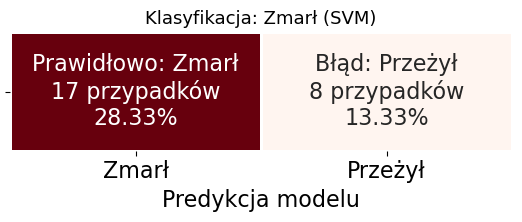

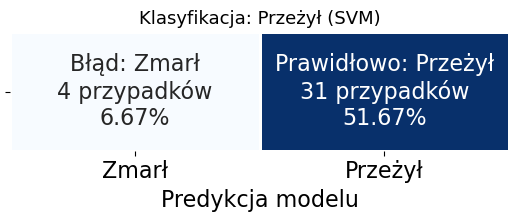

≈örednia dok≈Çadno≈õƒá (5-krotna walidacja krzy≈ºowa): 79.92%


In [103]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score

# Najlepsze jƒÖdro SVM (na podstawie wcze≈õniejszych wynik√≥w ‚Äì np. 'linear')
svm_best = SVC(kernel='linear', class_weight='balanced', probability=True, random_state=42)
svm_best.fit(X_train_norm, y_train)

# Predykcja
y_svm = svm_best.predict(X_test_norm)

# Wyniki
print("SVM ‚Äì dok≈Çadno≈õƒá treningowa: {:.2f}%".format(100 * svm_best.score(X_train_norm, y_train)))
print("SVM ‚Äì dok≈Çadno≈õƒá testowa: {:.2f}%".format(100 * accuracy_score(y_test, y_svm)))
print("\nRaport klasyfikacji:\n")
print(classification_report(y_test, y_svm, target_names=["Prze≈ºy≈Ç", "Zmar≈Ç"], zero_division=0))

# Macierz pomy≈Çek
cm = confusion_matrix(y_test, y_svm)
TN, FP, FN, TP = cm.ravel()
total = cm.sum()

# Wykres ‚Äì Zmar≈Ç
data_zmarl = np.array([[TP, FN]])
labels_zmarl = np.array([[
    f"Prawid≈Çowo: Zmar≈Ç\n{TP} przypadk√≥w\n{TP/total:.2%}",
    f"B≈ÇƒÖd: Prze≈ºy≈Ç\n{FN} przypadk√≥w\n{FN/total:.2%}"
]])

plt.figure(figsize=(5.5, 2.5))
sns.heatmap(data_zmarl, annot=labels_zmarl, fmt='', cmap='Reds',
            xticklabels=["Zmar≈Ç", "Prze≈ºy≈Ç"], yticklabels=[""],
            cbar=False, linewidths=1)
plt.title("Klasyfikacja: Zmar≈Ç (SVM)", fontsize=13)
plt.xlabel("Predykcja modelu")
plt.tight_layout()
plt.savefig("svm_zmar≈Ç.png", dpi=300, bbox_inches='tight')
plt.show()

# Wykres ‚Äì Prze≈ºy≈Ç
data_przezyli = np.array([[FP, TN]])
labels_przezyli = np.array([[
    f"B≈ÇƒÖd: Zmar≈Ç\n{FP} przypadk√≥w\n{FP/total:.2%}",
    f"Prawid≈Çowo: Prze≈ºy≈Ç\n{TN} przypadk√≥w\n{TN/total:.2%}"
]])

plt.figure(figsize=(5.5, 2.5))
sns.heatmap(data_przezyli, annot=labels_przezyli, fmt='', cmap='Blues',
            xticklabels=["Zmar≈Ç", "Prze≈ºy≈Ç"], yticklabels=[""],
            cbar=False, linewidths=1)
plt.title("Klasyfikacja: Prze≈ºy≈Ç (SVM)", fontsize=13)
plt.xlabel("Predykcja modelu")
plt.tight_layout()
plt.savefig("svm_prze≈ºy≈Ç.png", dpi=300, bbox_inches='tight')
plt.show()

# Krzy≈ºowa walidacja
cv_scores = cross_val_score(svm_best, X_norm, y_norm, cv=5)
print("≈örednia dok≈Çadno≈õƒá (5-krotna walidacja krzy≈ºowa): {:.2f}%".format(100 * cv_scores.mean()))


Model SVM osiƒÖgnƒÖ≈Ç dok≈Çadno≈õƒá treningowƒÖ 84.52% i testowƒÖ 80.00%, co oznacza, ≈ºe dobrze generalizuje ‚Äî nie jest przeuczony, a jednocze≈õnie zachowuje wysokƒÖ skuteczno≈õƒá na nieznanych danych.

W por√≥wnaniu do innych modeli:

SVM osiƒÖga najwy≈ºszƒÖ dok≈Çadno≈õƒá na zbiorze testowym spo≈õr√≥d wszystkich testowanych modeli (Logistic Regression, Decision Tree, Random Forest),

utrzymuje bardzo dobrƒÖ r√≥wnowagƒô miƒôdzy klasami ‚Äî f1-score dla klasy ‚ÄûPrze≈ºy≈Ç‚Äù to 0.84, a dla ‚ÄûZmar≈Ç‚Äù 0.74.

Z raportu klasyfikacji wynika, ≈ºe:

klasa ‚ÄûZmar≈Ç‚Äù zosta≈Ça rozpoznana z dobrƒÖ precyzjƒÖ (81%) oraz umiarkowanƒÖ czu≈Ço≈õciƒÖ (68%),

klasa ‚ÄûPrze≈ºy≈Ç‚Äù uzyska≈Ça czu≈Ço≈õƒá na poziomie 89%, co oznacza, ≈ºe model rzadko b≈Çƒôdnie klasyfikuje pacjent√≥w, kt√≥rzy rzeczywi≈õcie prze≈ºyli.

### Regresja logistyczna

Regresja logistyczna ‚Äì dok≈Çadno≈õƒá treningowa: 83.26%
Regresja logistyczna ‚Äì dok≈Çadno≈õƒá testowa: 80.00%

Raport klasyfikacji:

              precision    recall  f1-score   support

     Prze≈ºy≈Ç       0.78      0.91      0.84        35
       Zmar≈Ç       0.84      0.64      0.73        25

    accuracy                           0.80        60
   macro avg       0.81      0.78      0.78        60
weighted avg       0.81      0.80      0.79        60



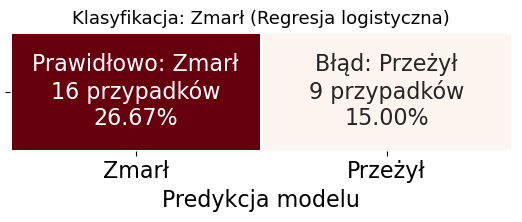

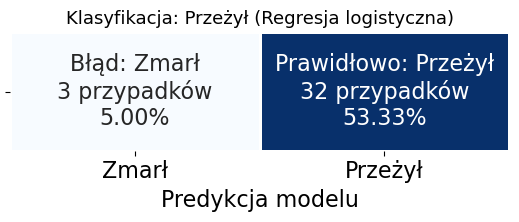

≈örednia dok≈Çadno≈õƒá (5-krotna walidacja krzy≈ºowa): 77.25%


In [102]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Skalowanie danych
scaler = StandardScaler()
X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.transform(X_test)

# Po≈ÇƒÖczenie danych do walidacji krzy≈ºowej
X_norm = np.vstack((X_train_norm, X_test_norm))
y_norm = np.hstack((y_train, y_test))

# Model
log_reg = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)
log_reg.fit(X_train_norm, y_train)

# Predykcja
y_log = log_reg.predict(X_test_norm)

# Wyniki
print("Regresja logistyczna ‚Äì dok≈Çadno≈õƒá treningowa: {:.2f}%".format(100 * log_reg.score(X_train_norm, y_train)))
print("Regresja logistyczna ‚Äì dok≈Çadno≈õƒá testowa: {:.2f}%".format(100 * accuracy_score(y_test, y_log)))
print("\nRaport klasyfikacji:\n")
print(classification_report(y_test, y_log, target_names=["Prze≈ºy≈Ç", "Zmar≈Ç"], zero_division=0))

# Macierz pomy≈Çek
cm = confusion_matrix(y_test, y_log)
TN, FP, FN, TP = cm.ravel()
total = cm.sum()

# Wykres ‚Äì Zmar≈Ç
data_zmarl = np.array([[TP, FN]])
labels_zmarl = np.array([[
    f"Prawid≈Çowo: Zmar≈Ç\n{TP} przypadk√≥w\n{TP/total:.2%}",
    f"B≈ÇƒÖd: Prze≈ºy≈Ç\n{FN} przypadk√≥w\n{FN/total:.2%}"
]])

plt.figure(figsize=(5.5, 2.5))
sns.heatmap(data_zmarl, annot=labels_zmarl, fmt='', cmap='Reds',
            xticklabels=["Zmar≈Ç", "Prze≈ºy≈Ç"], yticklabels=[""],
            cbar=False, linewidths=1)
plt.title("Klasyfikacja: Zmar≈Ç (Regresja logistyczna)", fontsize=13)
plt.xlabel("Predykcja modelu")
plt.tight_layout()
plt.savefig("logreg_zmar≈Ç.png", dpi=300, bbox_inches='tight')
plt.show()

# Wykres ‚Äì Prze≈ºy≈Ç
data_przezyli = np.array([[FP, TN]])
labels_przezyli = np.array([[
    f"B≈ÇƒÖd: Zmar≈Ç\n{FP} przypadk√≥w\n{FP/total:.2%}",
    f"Prawid≈Çowo: Prze≈ºy≈Ç\n{TN} przypadk√≥w\n{TN/total:.2%}"
]])

plt.figure(figsize=(5.5, 2.5))
sns.heatmap(data_przezyli, annot=labels_przezyli, fmt='', cmap='Blues',
            xticklabels=["Zmar≈Ç", "Prze≈ºy≈Ç"], yticklabels=[""],
            cbar=False, linewidths=1)
plt.title("Klasyfikacja: Prze≈ºy≈Ç (Regresja logistyczna)", fontsize=13)
plt.xlabel("Predykcja modelu")
plt.tight_layout()
plt.savefig("logreg_prze≈ºy≈Ç.png", dpi=300, bbox_inches='tight')
plt.show()

# Krzy≈ºowa walidacja
cv_scores = cross_val_score(log_reg, X_norm, y_norm, cv=5)
print("≈örednia dok≈Çadno≈õƒá (5-krotna walidacja krzy≈ºowa): {:.2f}%".format(100 * cv_scores.mean()))


Regresja logistyczna osiƒÖgnƒô≈Ça dok≈Çadno≈õƒá treningowƒÖ na poziomie 83.26% oraz testowƒÖ 80.00%, co pokazuje, ≈ºe model nie jest przeuczony i dobrze generalizuje do nowych danych.

Z raportu klasyfikacji wynika, ≈ºe:

Klasa ‚ÄûPrze≈ºy≈Ç‚Äù zosta≈Ça rozpoznana z wysokƒÖ czu≈Ço≈õciƒÖ (91%) i dobrƒÖ precyzjƒÖ (78%), co prze≈Ço≈ºy≈Ço siƒô na f1-score = 0.84.

Klasa ‚ÄûZmar≈Ç‚Äù zosta≈Ça rozpoznana z wysokƒÖ precyzjƒÖ (84%), ale umiarkowanƒÖ czu≈Ço≈õciƒÖ (64%) ‚Äî model wiƒôc czƒô≈õciej pomija przypadki zgonu ni≈º je fa≈Çszywie wskazuje, co jest typowym kompromisem w tego typu klasyfikatorach.

### Wnioski

üìà Ranking modeli ‚Äì wykrycie klasy 'Zmar≈Ç' (najwy≈ºszy recall):
                 Model  Recall (Zmar≈Ç)
2                  SVM            0.68
3  Logistic Regression            0.64
0        Decision Tree            0.48
1        Random Forest            0.48

üìâ Ranking modeli ‚Äì wykrycie klasy 'Prze≈ºy≈Ç' (najwy≈ºszy recall):
                 Model  Recall (Prze≈ºy≈Ç)
1        Random Forest              0.91
3  Logistic Regression              0.91
2                  SVM              0.89
0        Decision Tree              0.83


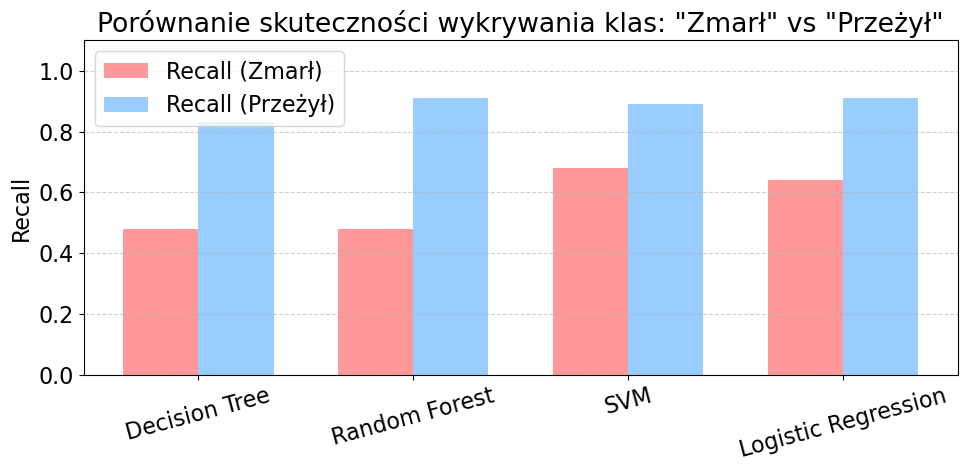

In [105]:
import pandas as pd
import matplotlib.pyplot as plt

# Dane: recall dla ka≈ºdej klasy
recall_df = pd.DataFrame({
    'Model': ['Decision Tree', 'Random Forest', 'SVM', 'Logistic Regression'],
    'Recall (Zmar≈Ç)': [0.48, 0.48, 0.68, 0.64],
    'Recall (Prze≈ºy≈Ç)': [0.83, 0.91, 0.89, 0.91]
})

# Ranking wed≈Çug klasy "Zmar≈Ç"
ranking_zmarl = recall_df.sort_values(by='Recall (Zmar≈Ç)', ascending=False)

# Ranking wed≈Çug klasy "Prze≈ºy≈Ç"
ranking_przezyli = recall_df.sort_values(by='Recall (Prze≈ºy≈Ç)', ascending=False)

print("üìà Ranking modeli ‚Äì wykrycie klasy 'Zmar≈Ç' (najwy≈ºszy recall):")
print(ranking_zmarl[['Model', 'Recall (Zmar≈Ç)']])
print("\nüìâ Ranking modeli ‚Äì wykrycie klasy 'Prze≈ºy≈Ç' (najwy≈ºszy recall):")
print(ranking_przezyli[['Model', 'Recall (Prze≈ºy≈Ç)']])

# Wykres por√≥wnawczy
plt.figure(figsize=(10, 5))
bar_width = 0.35
x = range(len(recall_df))

plt.bar(x, recall_df['Recall (Zmar≈Ç)'], width=bar_width, label='Recall (Zmar≈Ç)', color='#FF9999')
plt.bar([p + bar_width for p in x], recall_df['Recall (Prze≈ºy≈Ç)'], width=bar_width, label='Recall (Prze≈ºy≈Ç)', color='#99CCFF')

plt.xticks([p + bar_width / 2 for p in x], recall_df['Model'], rotation=15)
plt.ylabel('Recall')
plt.title('Por√≥wnanie skuteczno≈õci wykrywania klas: "Zmar≈Ç" vs "Prze≈ºy≈Ç"')
plt.legend()
plt.ylim(0, 1.1)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()
